In [7]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import pandas as pd
import matplotlib.pyplot as plot

In [9]:
import numpy as np
from numpy import *
import math
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
Industry_data = pd.read_csv("StudentsPerformance.csv")
Industry_data

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

In [13]:
Industry_data.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [14]:
print(Industry_data.shape)

(1000, 8)


In [15]:
Industry_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### First step in Data Cleaning- updating the column names so that the data in those features are accessible.

In [16]:
# Here we are trying to rename the parental level of education column name as parental_level_of_education can't be read. We are renaming it to Height_inches
# Also, we are renaming the column name test preparation_course to test_preparation_course, math score as math_score,reading score as reading_score and 
#writing score as writing_score
Industry_data = Industry_data.rename(columns = {'parental level of education' : 'parental_level_of_education','test preparation course':'test_preparation_course','math score':'math_score','reading score': 'reading_score'
,'writing score':'writing_score','race/ethnicity':'race_ethnicity'})

In [17]:
df = Industry_data.head(10000)
df

gender race_ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

In [18]:
Industry_data.tail()

gender race_ethnicity parental_level_of_education         lunch  \
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86

In [19]:
print(Industry_data.columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


In [20]:
print(Industry_data.columns[0:3])
# selecting the few variabes from the whole variables

Index(['gender', 'race_ethnicity', 'parental_level_of_education'], dtype='object')


In [21]:
print(Industry_data.dtypes)
# Data types of all the columns

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object


In [22]:
print(Industry_data['gender'].dtypes)
# to get the datatype of a respective(particular) column

object


In [23]:
print(Industry_data.shape)
# It will gives the count of all the instances present in the dataset

(1000, 8)


In [24]:
print('Number of rows:',Industry_data.shape[0])
print('Number of columns:',Industry_data.shape[1])


Number of rows: 1000
Number of columns: 8


In [25]:
print(Industry_data.head(2)) 
# getting the first 2 rows

   gender race_ethnicity parental_level_of_education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  


In [26]:
print(Industry_data.math_score.unique())
# prints the unique values from the section column

[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]


In [27]:
print(Industry_data.gender.unique()) 

['female' 'male']


In [28]:
print(Industry_data.race_ethnicity.unique())

['group B' 'group C' 'group A' 'group D' 'group E']


In [29]:
print(Industry_data.parental_level_of_education.unique())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [30]:
print(Industry_data.test_preparation_course.unique())

['none' 'completed']


## These below three blocks of code is completely dedicated to fetch the Missing values

In [31]:
# It will take out all the feature names which had null values
# The second line of the code will print the respective feature and the % of the missing values in that respective feature.

features_with_na=[features for features in Industry_data.columns if Industry_data[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature, np.round(Industry_data[feature].isnull().mean(),4), '%missing value')

In [32]:
for feature in features_with_na:
    data_Industry=Industry_data.copy()
    data_Industry[feature]=np.where(data[feature].isnull(),1,0)
    data_Industry.groupby(feature)['parental_level_of_education'].meadian().plot.bar()
    plt.title(feature)
    plt.show()
    

In [33]:
# Here if there is a relation between the missing values and the dependent variables. 
# we need to replace these nan values with something meaningful(Mean/Median/Mode/ some meaningful value) which will be done.
# In our scenario there are no missing values so no output. so, no need to worry about this.

## By this we can conclude that there are no Null Values present in the Dataset

In [34]:
# It will prints the count of Null values in the dataset. So, here there are No Null Values
print(Industry_data.isnull().sum())

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


# Exploratory Data Analysis (EDA) of the steel industry Dataset

In [35]:
pd.pandas.set_option('display.max_columns',None)

# Numerical Features

In [36]:
# It will take out all the features with Numerical Data.
numerical_features= [feature for feature in Industry_data.columns if Industry_data[feature].dtype != 'O']
print('Number of numerical features: ', len(numerical_features))
Industry_data[numerical_features].head()

Number of numerical features:  3


math_score  reading_score  writing_score
0          72             72             74
1          69             90             88
2          90             95             93
3          47             57             44
4          76             78             75

In [37]:
# Numerical Variables are of two types 
# Discrete and Continouos Varibales

Discrete_features= [feature for feature in numerical_features if len(Industry_data[feature].unique()) < 25]
print('Number of Discrete features: {}'.format(len(Discrete_features)))
Industry_data[Discrete_features].head()

Number of Discrete features: 0


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [38]:
# Here we are finding the relationship between the Usage feature and discrete features

for feature in Discrete_features:
    data = Industry_data.copy()
    data.groupby(feature)['parental_level_of_education].median().plot.bar()']
    plot.xlabel(feature)
    plot.ylabel('parental_level_of_education')
    plot.title(feature)
    plot.show()
    

In [39]:
Continuous_features= [feature for feature in numerical_features if feature not in Discrete_features]
print('Number of continous features: {}'.format(len(Continuous_features)))
Industry_data[Continuous_features].head()

Number of continous features: 3


math_score  reading_score  writing_score
0          72             72             74
1          69             90             88
2          90             95             93
3          47             57             44
4          76             78             75

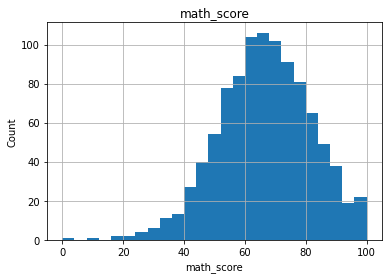

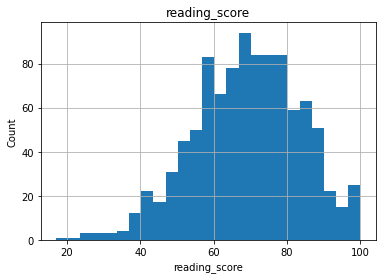

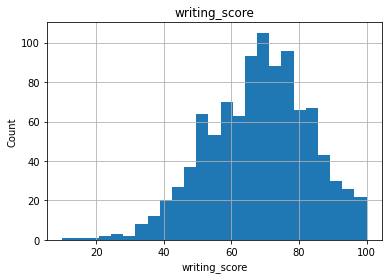

In [40]:
# These are the continuous variables and we will find the distributions of the continous variables for that we will use Histograms.
# There is a skewed data, so we need to convert skewed data into Gauss distribution or Standard Normal Distribution.
for feature in Continuous_features:
    data = Industry_data.copy()
    data[feature].hist(bins=25)
    plot.xlabel(feature)
    plot.ylabel('Count')
    plot.title(feature)
    plot.show()

In [41]:
Categorical_features= [feature for feature in Industry_data.columns if Industry_data[feature].dtype == 'O']
Categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [42]:
Industry_data[Categorical_features].head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  
0                    none  
1               completed  
2                    none  
3                    none  
4                    none

In [43]:
for feature in Categorical_features:
    print('the feature is {} and number of categories are {}'.format(feature,len(Industry_data[feature].unique())))

the feature is gender and number of categories are 2
the feature is race_ethnicity and number of categories are 5
the feature is parental_level_of_education and number of categories are 6
the feature is lunch and number of categories are 2
the feature is test_preparation_course and number of categories are 2


In [44]:
Industry_data.describe()

math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [45]:
Industry_data.corr()

math_score  reading_score  writing_score
math_score       1.000000       0.817580       0.802642
reading_score    0.817580       1.000000       0.954598
writing_score    0.802642       0.954598       1.000000

# 5 DATA VISUALIZATION TASKS

# 1. SCATER PLOT

# Scatterplots for all the features with the feature 'math_score' ''

In [46]:
Industry_data.skew(axis = 1, skipna = True)

0      1.732051
1     -1.674210
2     -0.585583
3      1.361301
4      0.935220
         ...   
995   -0.782152
996    1.732051
997    0.000000
998   -1.668034
999   -1.732051
Length: 1000, dtype: float64

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

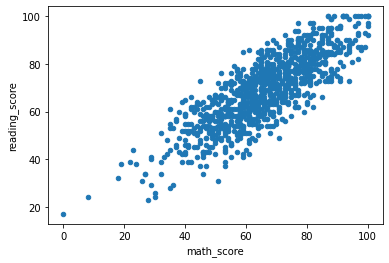

In [47]:
# scatterpot for Weight_Pounds & Height_inches
Industry_data.plot.scatter(x = 'math_score',  y = 'reading_score')

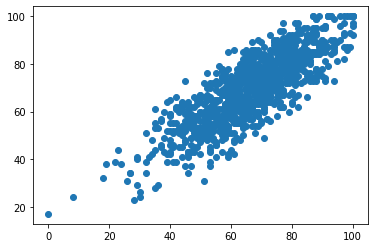

In [48]:
plot.scatter(Industry_data.math_score, Industry_data.reading_score)

<AxesSubplot:xlabel='math_score', ylabel='writing_score'>

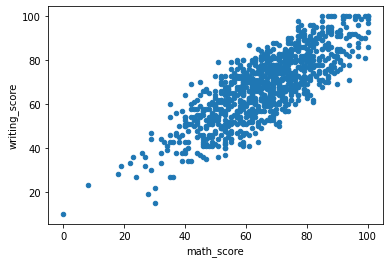

In [49]:
# scatterpot for Weight_Pounds & Age
Industry_data.plot.scatter(x = 'math_score', y = 'writing_score')

Applying log normal transformation and checking the skewness in the scatter plot

In [50]:
Industry_data['math_score'] = np.log(Industry_data['math_score'])
Industry_data.head()


gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none    4.276666             72             74  
1               completed    4.234107             90             88  
2                    none    4.499810             95             93  
3                    none    3.850148             57             44  
4                    none    4.330733             78             75

<AxesSubplot:xlabel='math_score', ylabel='parental_level_of_education'>

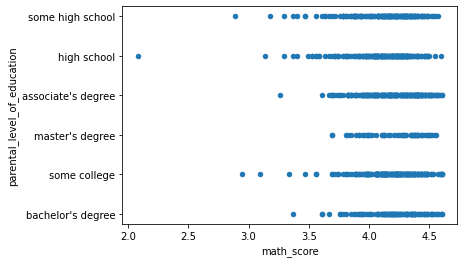

In [51]:
# scatterpot for Leading_Current_Reactive_Power_kVarh & Usage_kWh
Industry_data.plot.scatter(x = 'math_score', y = 'parental_level_of_education')

<AxesSubplot:xlabel='math_score', ylabel='race_ethnicity'>

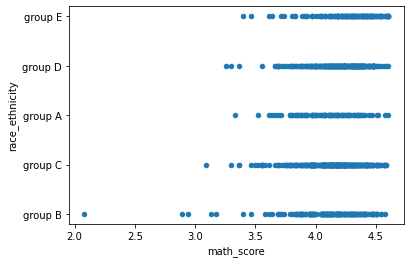

In [52]:
Industry_data.plot.scatter(x = 'math_score', y = 'race_ethnicity')

## 2. BOX PLOTS

### Box plots of all the features is presented below.

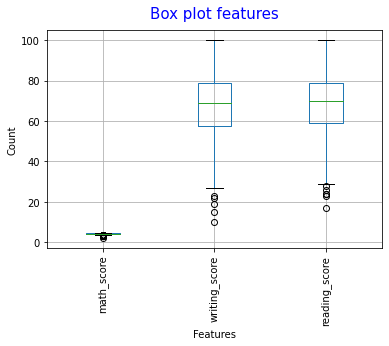

In [53]:
chart = Industry_data.boxplot(column = ['math_score','writing_score','reading_score'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plot.title('Box plot features', fontsize = 15, color = 'b', pad = 12)
plot.xlabel('Features')
plot.ylabel('Count')
plot.show()

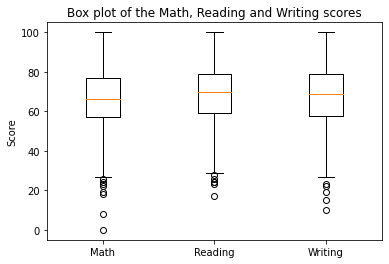

In [54]:
fig, ax = plt.subplots()
ax.boxplot([df['math_score'], df['reading_score'], df['writing_score']])
ax.set_xticklabels(['Math', 'Reading', 'Writing'])
ax.set_ylabel("Score")
ax.set_title("Box plot of the Math, Reading and Writing scores")

plt.show()

## Fetching and replacing outliers from Reading_scores

[Text(0.5, 1.0, 'Boxplot of reading_score')]

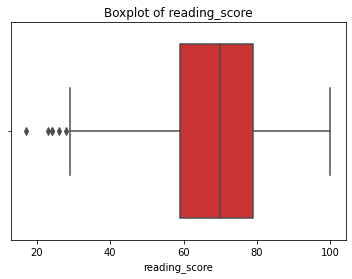

In [55]:
sns.boxplot(x='reading_score', data=Industry_data, palette='Set1').set(title='Boxplot of reading_score')

In [56]:
def outliers(df, feature):
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lowerBound = Q1 - 1.5*IQR
    upperBound = Q3 + 1.5*IQR

    outlier_indices = df.index[(df[feature] < lowerBound) | (df[feature] > upperBound)]

    return outlier_indices

In [57]:
def replace_outliers(df, feature, outlier_list, measure):
    replacement = 0.0
    if measure == 'Mean':
        replacement = df[feature].mean()
    elif(measure == 'Median'):
        replacement = df[feature].median()
    else:
        replacement = df[feature].mode()
    for idx in outlier_list:
        df[feature][idx] = replacement
    return

In [58]:
tsc_outliers = outliers(Industry_data, 'reading_score')
print('Indices of outliers: ', tsc_outliers)

Indices of outliers:  Int64Index([59, 76, 211, 327, 596, 980], dtype='int64')


In [59]:
replace_outliers(Industry_data, 'reading_score', tsc_outliers, 'Median')

[Text(0.5, 1.0, 'math_score')]

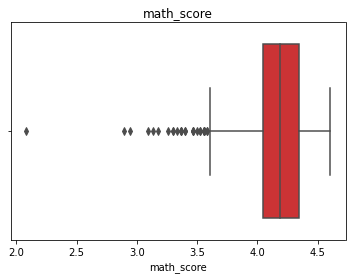

In [60]:
sns.boxplot(x='math_score', data=Industry_data, palette='Set1').set(title='math_score')

## Fetching and replacing outliers from writing_scores

[Text(0.5, 1.0, 'writing_score')]

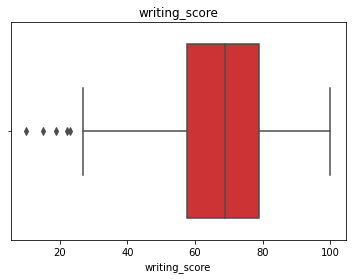

In [61]:
sns.boxplot(x='writing_score', data=Industry_data, palette='Set1').set(title='writing_score')

In [62]:
tsc_outliers = outliers(Industry_data, 'writing_score')
print('Indices of outliers: ', tsc_outliers)

Indices of outliers:  Int64Index([59, 76, 327, 596, 980], dtype='int64')


In [63]:
replace_outliers(Industry_data, 'writing_score', tsc_outliers, 'Median')

## This is the Box Plot after working on the ourliers

[Text(0.5, 1.0, 'Boxplot of writing_score')]

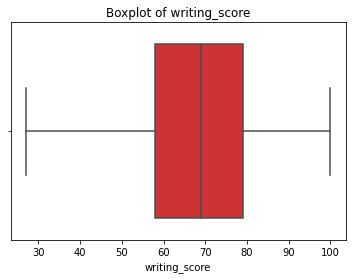

In [64]:
sns.boxplot(x='writing_score', data=Industry_data, palette='Set1').set(title='Boxplot of writing_score')

# 3. HISTOGRAM PLOTS

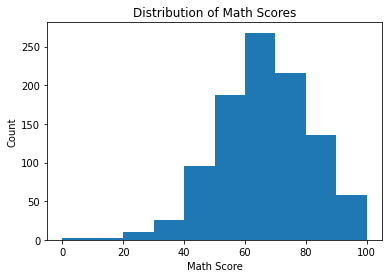

In [65]:
#histogram plot of math scores
plt.hist(data['math_score'], bins=range(0, 110, 10))
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Count')
plt.show()

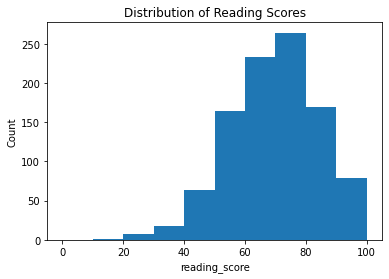

In [66]:
plt.hist(data['reading_score'], bins=range(0, 110, 10))
plt.title('Distribution of Reading Scores')
plt.xlabel('reading_score')
plt.ylabel('Count')
plt.show()

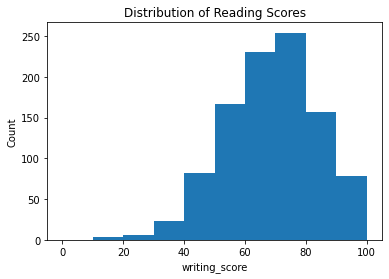

In [67]:
plt.hist(data['writing_score'], bins=range(0, 110, 10))
plt.title('Distribution of Reading Scores')
plt.xlabel('writing_score')
plt.ylabel('Count')
plt.show()

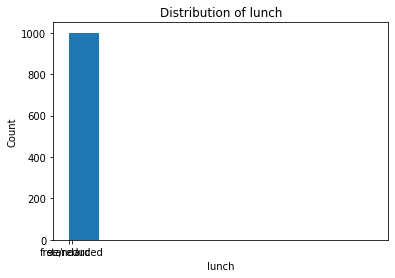

In [68]:
plt.hist(data['lunch'], bins=range(0, 110, 10))
plt.title('Distribution of lunch')
plt.xlabel('lunch')
plt.ylabel('Count')
plt.show()

# 4. Bar plot of the number of students who scored above and below 60 in Math:

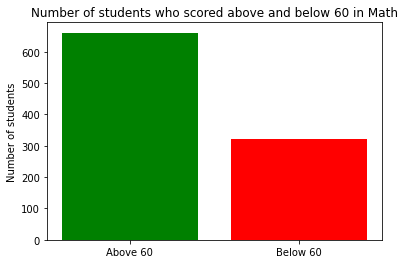

In [69]:
above_60 = len(df[df['math_score'] > 60])
below_60 = len(df[df['math_score'] < 60])

# Create the bar plot
fig, ax = plt.subplots()
ax.bar(["Above 60", "Below 60"], [above_60, below_60], color=["green", "red"])
ax.set_ylabel("Number of students")
ax.set_title("Number of students who scored above and below 60 in Math")

plt.show()

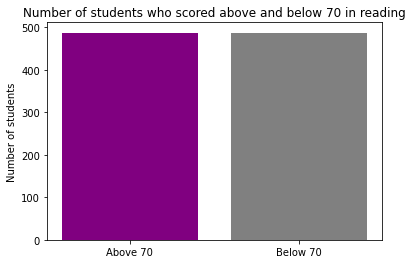

In [70]:
above_70 = len(df[df['reading_score'] > 70])
below_70 = len(df[df['reading_score'] < 70])

# Create the bar plot
fig, ax = plt.subplots()
ax.bar(["Above 70", "Below 70"], [above_70, below_70], color=["purple", "grey"])
ax.set_ylabel("Number of students")
ax.set_title("Number of students who scored above and below 70 in reading")

plt.show()

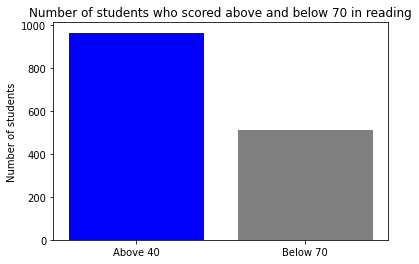

In [71]:
above_40 = len(df[df['writing_score'] > 40])
below_70 = len(df[df['writing_score'] < 70])

# Create the bar plot
fig, ax = plt.subplots()
ax.bar(["Above 40", "Below 70"], [above_40, below_70], color=["blue", "grey"])
ax.set_ylabel("Number of students")
ax.set_title("Number of students who scored above and below 70 in reading")

plt.show()

# 5. Bar plot of the average scores of male and female students:

Text(0, 0.5, 'Score')

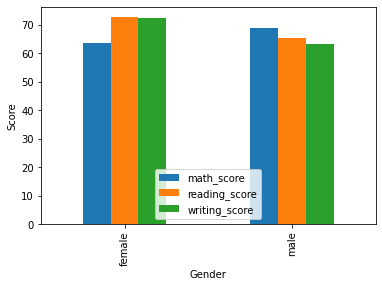

In [72]:
# Calculate the average scores of male and female students
avg_scores = df.groupby('gender').mean()[['math_score', 'reading_score', 'writing_score']]

# Create the bar plot
fig, ax = plt.subplots()
avg_scores.plot(kind='bar', ax=ax)
ax.set_xlabel("Gender")
ax.set_ylabel("Score")

In [73]:
pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 35.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 17.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=650726c61b68964de6662889e39e88325370a6ec778fc52ae0a1a5f3e30ef179
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Unin

In [74]:
from pandas_profiling import ProfileReport

In [75]:
profile_report = ProfileReport(Industry_data)

## This is the complete profile report of the data given.
## Each time when we want to work on this, we need to run this command.

In [76]:
profile_report.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Spearman's Correlation map


<AxesSubplot:>

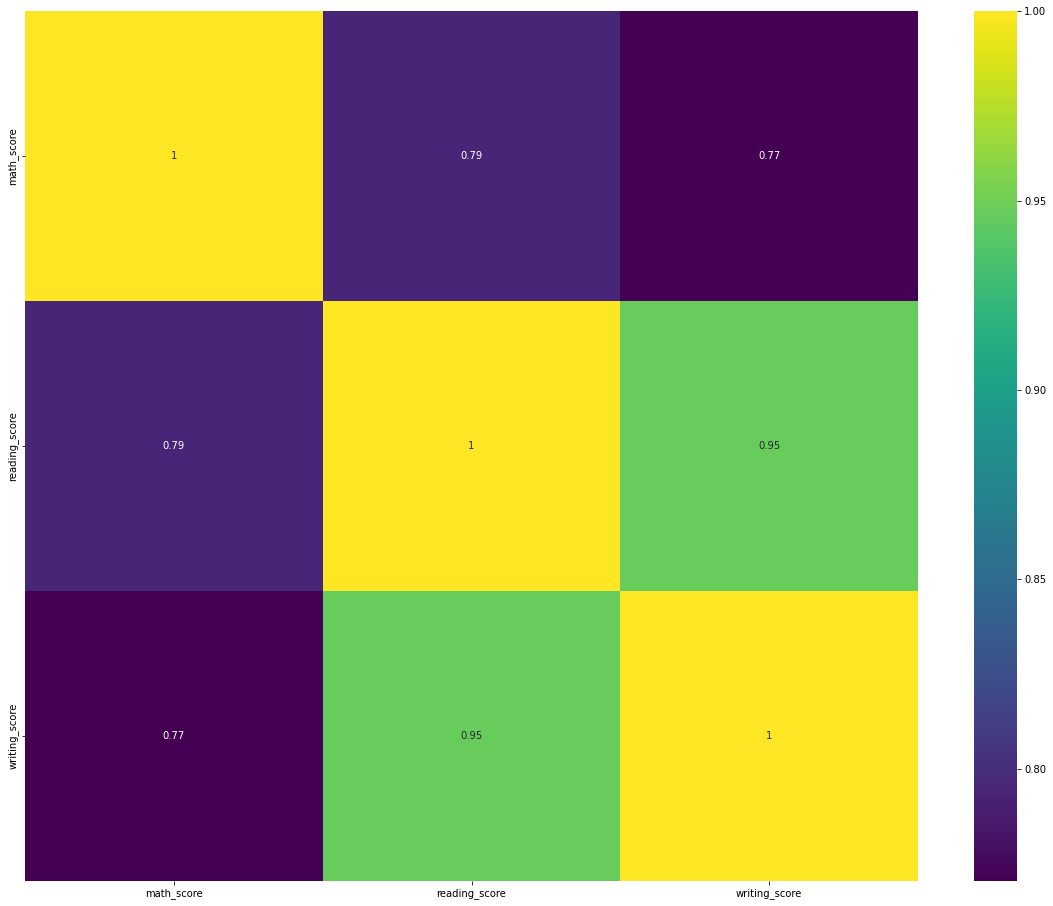

In [77]:
plot.figure(figsize=(20,16))
sns.heatmap(Industry_data.corr(method='spearman'),cmap='viridis',annot=True)

## Indexing is done on the data feature and one hot encoding is applied on categorical data.

In [78]:
#indexing date
Industry_data = Industry_data.set_index('writing_score')

In [79]:
parental_level_of_education = pd.get_dummies(Industry_data['parental_level_of_education'], drop_first = True, prefix = 'Dummy')

In [80]:
Industry_data = pd.concat([Industry_data, parental_level_of_education], axis = 1)

In [81]:
race_ethnicity = pd.get_dummies(Industry_data['race_ethnicity'], drop_first = True, prefix = 'Dummy')

In [82]:
Industry_data = pd.concat([Industry_data, race_ethnicity], axis = 1)

In [ ]:
gender = pd.get_dummies(Industry_data['gender'], drop_first = True, prefix = 'Dummy')

In [ ]:
Industry_data = pd.concat([Industry_data, gender], axis = 1)

In [ ]:
test_preparation_course = pd.get_dummies(Industry_data['test_preparation_course'], drop_first = True, prefix = 'Dummy')

In [ ]:
Industry_data = pd.concat([Industry_data, test_preparation_course], axis = 1)

In [ ]:
lunch = pd.get_dummies(Industry_data['lunch'], drop_first = True, prefix = 'Dummy')

In [ ]:
Industry_data = pd.concat([Industry_data, lunch], axis = 1)

In [ ]:
Industry_data= Industry_data.drop(['parental_level_of_education', 'race_ethnicity', 'gender','test_preparation_course','lunch'], axis=1)

In [ ]:
Industry_data

In [ ]:
Industry_data.columns

In [ ]:
print(Industry_data.dtypes)
# Data types of all the columns

## Coverting the dataframe into a csv file

In [ ]:
Industry_data.to_csv('StudentsPerformance_assignment_cleaned.csv')

## Coverting the dataframe into a npz file format
### There are steps invoved for this: 
### First, the dataframe is converted into a numpy array format and then numpy array is loaded into a .npz file

In [ ]:
numpy_array=Industry_data.to_numpy()

In [ ]:
numpy_array

In [ ]:
savez_compressed('StudentsPerformance_assignment_cleaned.npz', numpy_array)